# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from curtis_api_keys import weather_api_key
from curtis_api_keys import nrel_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (25, 50)
lng_range = (-70, -130)
print(nrel_key)

0e5tIu9rnsFef9RTGSBxNTYgr5tkNmvewgtqV9ne


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=5000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=5000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


1357

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

#create blank lists for data
returned_city=[]          
lat=[]           
lng=[]          
max_temp=[]      
humidity=[]     
cloudiness=[]    
wind_speed=[]    
country=[]       
date=[]          


# Loop through the list of cities and perform a request for data on each
count=0
missing=0
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json() 
#     print(response)
    try:
        
        returned_city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        count+=1
        print(f'Processing Recored {count} of {len(cities)} | {city}') 
    except:
        returned_city.append("")
        lat.append("")
        lng.append("")
        max_temp.append("")
        humidity.append("")
        cloudiness.append("")
        wind_speed.append("")
        country.append("")
        date.append("")
        missing+=1
        print(f'City {city} not found. Skipping, total not found = {missing}')
    if count+missing >=1000:
        break
    
#     time.sleep(2)
      

Processing Recored 1 of 1357 | fortuna
Processing Recored 2 of 1357 | elizabeth city
Processing Recored 3 of 1357 | guerrero negro
Processing Recored 4 of 1357 | sault sainte marie
Processing Recored 5 of 1357 | grand forks
Processing Recored 6 of 1357 | escanaba
Processing Recored 7 of 1357 | jupiter
Processing Recored 8 of 1357 | hurricane
Processing Recored 9 of 1357 | chalmette
Processing Recored 10 of 1357 | hays
Processing Recored 11 of 1357 | jonesboro
Processing Recored 12 of 1357 | hermiston
Processing Recored 13 of 1357 | saint george
Processing Recored 14 of 1357 | clarksburg
Processing Recored 15 of 1357 | cockburn town
Processing Recored 16 of 1357 | nantucket
Processing Recored 17 of 1357 | las cruces
Processing Recored 18 of 1357 | barraute
Processing Recored 19 of 1357 | canon city
Processing Recored 20 of 1357 | lompoc
Processing Recored 21 of 1357 | bagotville
Processing Recored 22 of 1357 | brigantine
Processing Recored 23 of 1357 | estelle
Processing Recored 24 of 1

Processing Recored 190 of 1357 | brownsville
Processing Recored 191 of 1357 | praxedis guerrero
Processing Recored 192 of 1357 | atlantic beach
Processing Recored 193 of 1357 | spanish fork
Processing Recored 194 of 1357 | oil city
Processing Recored 195 of 1357 | wyoming
Processing Recored 196 of 1357 | pelham
Processing Recored 197 of 1357 | north bend
Processing Recored 198 of 1357 | fountain
Processing Recored 199 of 1357 | deep river
Processing Recored 200 of 1357 | weyburn
Processing Recored 201 of 1357 | fairmont
Processing Recored 202 of 1357 | dunmore town
Processing Recored 203 of 1357 | summerville
Processing Recored 204 of 1357 | wawa
Processing Recored 205 of 1357 | orillia
Processing Recored 206 of 1357 | lamar
Processing Recored 207 of 1357 | emporia
Processing Recored 208 of 1357 | dumas
Processing Recored 209 of 1357 | marshfield
Processing Recored 210 of 1357 | uniontown
Processing Recored 211 of 1357 | wenatchee
Processing Recored 212 of 1357 | elko
Processing Recore

Processing Recored 379 of 1357 | gravelbourg
Processing Recored 380 of 1357 | ontario
Processing Recored 381 of 1357 | lake havasu city
Processing Recored 382 of 1357 | onalaska
Processing Recored 383 of 1357 | hearst
Processing Recored 384 of 1357 | drummondville
Processing Recored 385 of 1357 | port huron
Processing Recored 386 of 1357 | cowansville
Processing Recored 387 of 1357 | tumwater
Processing Recored 388 of 1357 | victoria
Processing Recored 389 of 1357 | lewiston
Processing Recored 390 of 1357 | beeville
Processing Recored 391 of 1357 | port arthur
Processing Recored 392 of 1357 | jimenez
Processing Recored 393 of 1357 | azle
Processing Recored 394 of 1357 | silver city
Processing Recored 395 of 1357 | waterloo
Processing Recored 396 of 1357 | levelland
Processing Recored 397 of 1357 | north platte
Processing Recored 398 of 1357 | salem
Processing Recored 399 of 1357 | strathroy
Processing Recored 400 of 1357 | port hueneme
Processing Recored 401 of 1357 | great bend
Proces

Processing Recored 568 of 1357 | blacklick estates
Processing Recored 569 of 1357 | cambridge
Processing Recored 570 of 1357 | anahuac
Processing Recored 571 of 1357 | montrose
Processing Recored 572 of 1357 | lighthouse point
Processing Recored 573 of 1357 | iroquois falls
Processing Recored 574 of 1357 | trinidad
Processing Recored 575 of 1357 | south lake tahoe
Processing Recored 576 of 1357 | oskaloosa
Processing Recored 577 of 1357 | milford
Processing Recored 578 of 1357 | key west
Processing Recored 579 of 1357 | bennettsville
Processing Recored 580 of 1357 | mexico
Processing Recored 581 of 1357 | rapid city
Processing Recored 582 of 1357 | delta
Processing Recored 583 of 1357 | pinawa
Processing Recored 584 of 1357 | princeton
Processing Recored 585 of 1357 | kalamazoo
Processing Recored 586 of 1357 | owensboro
Processing Recored 587 of 1357 | west chester
Processing Recored 588 of 1357 | boissevain
Processing Recored 589 of 1357 | ashtabula
Processing Recored 590 of 1357 | lo

Processing Recored 757 of 1357 | culpeper
Processing Recored 758 of 1357 | blackfoot
Processing Recored 759 of 1357 | fort walton beach
Processing Recored 760 of 1357 | creel
Processing Recored 761 of 1357 | crestview
Processing Recored 762 of 1357 | roanoke rapids
Processing Recored 763 of 1357 | killarney
Processing Recored 764 of 1357 | lake wales
Processing Recored 765 of 1357 | terrace bay
Processing Recored 766 of 1357 | goose creek
Processing Recored 767 of 1357 | gravenhurst
Processing Recored 768 of 1357 | sweetwater
Processing Recored 769 of 1357 | newport beach
Processing Recored 770 of 1357 | nogales
Processing Recored 771 of 1357 | sooke
Processing Recored 772 of 1357 | la grande
Processing Recored 773 of 1357 | portage
Processing Recored 774 of 1357 | valle de allende
Processing Recored 775 of 1357 | belleville
Processing Recored 776 of 1357 | new lenox
Processing Recored 777 of 1357 | spring hill
Processing Recored 778 of 1357 | sunrise
Processing Recored 779 of 1357 | g

Processing Recored 944 of 1357 | osoyoos
Processing Recored 945 of 1357 | grafton
Processing Recored 946 of 1357 | andover
Processing Recored 947 of 1357 | carroll
Processing Recored 948 of 1357 | fayetteville
Processing Recored 949 of 1357 | muncie
Processing Recored 950 of 1357 | ada
Processing Recored 951 of 1357 | brook park
Processing Recored 952 of 1357 | kings mountain
Processing Recored 953 of 1357 | pleasantville
Processing Recored 954 of 1357 | oakley
Processing Recored 955 of 1357 | brookhaven
Processing Recored 956 of 1357 | raymond
Processing Recored 957 of 1357 | sioux falls
Processing Recored 958 of 1357 | statesville
Processing Recored 959 of 1357 | nixa
Processing Recored 960 of 1357 | casselman
Processing Recored 961 of 1357 | saint charles
Processing Recored 962 of 1357 | dearborn heights
Processing Recored 963 of 1357 | hamburg
Processing Recored 964 of 1357 | middletown
Processing Recored 965 of 1357 | montemorelos
Processing Recored 966 of 1357 | puerto palomas
Pr

In [5]:
weather_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date
}
weather_data = pd.DataFrame(weather_dict)
# weather_data=weather_data.round(1)
weather_data.dtypes

City          object
Lat           object
Lng           object
Max_Temp      object
Humidity      object
Cloudiness    object
Wind_Speed    object
Country       object
Date          object
dtype: object

In [6]:
weather_data['Lat']=pd.to_numeric(weather_data['Lat'])
weather_data['Lng']=pd.to_numeric(weather_data['Lng'])
weather_data['Humidity']=pd.to_numeric(weather_data['Humidity'])
weather_data['Cloudiness']=pd.to_numeric(weather_data['Cloudiness'])
weather_data['Wind_Speed']=pd.to_numeric(weather_data['Wind_Speed'])
weather_data['Date']=pd.to_numeric(weather_data['Date'])
weather_data.to_csv('output_data/Exported_weather_data2.csv')
weather_data.describe()

,Lat,Lng,Humidity,Cloudiness,Wind_Speed,Date
count,988.000000,988.000000,988.000000,988.000000,988.000000,9.880000e+02
mean,37.592642,-86.815445,53.783401,28.905870,3.685951,1.596240e+09
std,11.200633,38.294385,23.616011,33.634821,2.152232,1.243474e+02
min,-41.530000,-127.420000,1.000000,0.000000,0.120000,1.596240e+09
25%,32.930000,-107.512500,39.000000,1.000000,2.100000,1.596240e+09
50%,39.165000,-91.375000,56.000000,16.000000,3.210000,1.596240e+09
75%,44.072500,-80.317500,71.000000,53.500000,4.712500,1.596241e+09
max,59.780000,173.280000,100.000000,100.000000,21.000000,1.596241e+09


In [7]:
##testing request
# url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"
# query_url = f"{url}api_key={nrel_key}&lat=40&lon=105"
# response = requests.get(query_url).json() 
# response

In [8]:
# Save config information.
url = "https://developer.nrel.gov/api/solar/solar_resource/v1.json?"



#create blank lists for data
avg_dni_annual=[] 
avg_ghi_annual=[] 
avg_lat_tilt_annual=[] 
       
# lat=weather_data['Lat']
# lng=weather_data['Lng']

# Loop through the list of cities and perform a request for data on each based on lat/long
count=0
missing=0
for index, row in weather_data.iterrows():
    query_url = f"{url}api_key={nrel_key}&lat={row['Lat']}&lon={row['Lng']}"
#     query_url = f"{url}api_key={nrel_key}&lat={lat}&lon={lng}"
    response = requests.get(query_url).json() 
#     print(response)
#     if (count>10): break
    try:
        
        avg_dni_annual.append(response['outputs']['avg_dni']['annual'])
        avg_ghi_annual.append(response['outputs']['avg_ghi']['annual'])
        avg_lat_tilt_annual.append(response['outputs']['avg_lat_tilt']['annual'])
        count+=1
        print(f"Processing Recored {count} of {len(cities)} | {row['City']}") 
    except:
        avg_dni_annual.append("")
        avg_ghi_annual.append("")
        avg_lat_tilt_annual.append("")
        missing+=1
        print(f"Solar data not found for {row['City']}. Skipping, total not found = {missing}")
    if count+missing >=1000:
        break

    time.sleep(2)

Processing Recored 1 of 1357 | Fortuna
Processing Recored 2 of 1357 | Elizabeth City
Solar data not found for Guerrero Negro. Skipping, total not found = 1
Processing Recored 3 of 1357 | Sault Ste. Marie
Processing Recored 4 of 1357 | Grand Forks
Processing Recored 5 of 1357 | Escanaba
Processing Recored 6 of 1357 | Jupiter
Processing Recored 7 of 1357 | Hurricane
Processing Recored 8 of 1357 | Chalmette
Processing Recored 9 of 1357 | Hays
Processing Recored 10 of 1357 | Jonesboro
Processing Recored 11 of 1357 | Hermiston
Processing Recored 12 of 1357 | Saint George
Processing Recored 13 of 1357 | Clarksburg
Solar data not found for Cockburn Town. Skipping, total not found = 2
Processing Recored 14 of 1357 | Nantucket
Processing Recored 15 of 1357 | Las Cruces
Solar data not found for Barraute. Skipping, total not found = 3
Processing Recored 16 of 1357 | Cañon City
Processing Recored 17 of 1357 | Lompoc
Solar data not found for Bagotville. Skipping, total not found = 4
Processing Reco

Processing Recored 122 of 1357 | Pampa
Processing Recored 123 of 1357 | Eugene
Solar data not found for George Town. Skipping, total not found = 47
Processing Recored 124 of 1357 | Boulder
Processing Recored 125 of 1357 | Pierre
Processing Recored 126 of 1357 | Paducah
Processing Recored 127 of 1357 | Springville
Solar data not found for Madoc. Skipping, total not found = 48
Solar data not found for Saint-Michel-des-Saints. Skipping, total not found = 49
Processing Recored 128 of 1357 | San Angelo
Processing Recored 129 of 1357 | Flagstaff
Solar data not found for Parry Sound. Skipping, total not found = 50
Processing Recored 130 of 1357 | Bellevue
Processing Recored 131 of 1357 | Sunrise Manor
Solar data not found for Campbell River. Skipping, total not found = 51
Solar data not found for Amos. Skipping, total not found = 52
Processing Recored 132 of 1357 | Oswego
Solar data not found for Aberdeen. Skipping, total not found = 53
Processing Recored 133 of 1357 | Bismarck
Processing Rec

Processing Recored 237 of 1357 | Kalispell
Processing Recored 238 of 1357 | Weatherford
Processing Recored 239 of 1357 | Morgan City
Processing Recored 240 of 1357 | Tooele
Processing Recored 241 of 1357 | Rolla
Processing Recored 242 of 1357 | Marshall
Processing Recored 243 of 1357 | Iowa City
Processing Recored 244 of 1357 | Greenwood
Processing Recored 245 of 1357 | Mastic Beach
Solar data not found for Steinbach am Taunus. Skipping, total not found = 94
Processing Recored 246 of 1357 | Coos Bay
Processing Recored 247 of 1357 | Chambersburg
Solar data not found for Cocorit. Skipping, total not found = 95
Processing Recored 248 of 1357 | Arcata
Processing Recored 249 of 1357 | Lufkin
Solar data not found for . Skipping, total not found = 96
Solar data not found for San Buenaventura. Skipping, total not found = 97
Processing Recored 250 of 1357 | Green
Processing Recored 251 of 1357 | Del Rio
Processing Recored 252 of 1357 | Huntsville
Solar data not found for Abbeville. Skipping, to

Processing Recored 366 of 1357 | Pueblo
Solar data not found for Ahome. Skipping, total not found = 133
Processing Recored 367 of 1357 | Chesterton
Solar data not found for Hornepayne. Skipping, total not found = 134
Processing Recored 368 of 1357 | Traverse City
Solar data not found for Sydney. Skipping, total not found = 135
Solar data not found for Borger. Skipping, total not found = 136
Solar data not found for Kingston. Skipping, total not found = 137
Processing Recored 369 of 1357 | Humboldt
Processing Recored 370 of 1357 | Dickson
Processing Recored 371 of 1357 | Callaway
Processing Recored 372 of 1357 | Winona
Processing Recored 373 of 1357 | Cody
Processing Recored 374 of 1357 | Lakefield
Processing Recored 375 of 1357 | Lockhart
Processing Recored 376 of 1357 | Baraboo
Solar data not found for Constitución. Skipping, total not found = 138
Processing Recored 377 of 1357 | Ft. Pierce
Processing Recored 378 of 1357 | Rawlins
Processing Recored 379 of 1357 | Albion
Processing Rec

Processing Recored 484 of 1357 | Bryant
Processing Recored 485 of 1357 | Laramie
Processing Recored 486 of 1357 | Merced
Processing Recored 487 of 1357 | Cranston
Processing Recored 488 of 1357 | Bainbridge Island
Processing Recored 489 of 1357 | Madison Heights
Solar data not found for Ures. Skipping, total not found = 180
Solar data not found for Victoriaville. Skipping, total not found = 181
Solar data not found for Alice Town. Skipping, total not found = 182
Solar data not found for Province of Mantua. Skipping, total not found = 183
Solar data not found for Rock Sound. Skipping, total not found = 184
Processing Recored 490 of 1357 | Rumford
Processing Recored 491 of 1357 | Hoquiam
Solar data not found for Courtenay. Skipping, total not found = 185
Solar data not found for Santa Maria. Skipping, total not found = 186
Processing Recored 492 of 1357 | Plainview
Processing Recored 493 of 1357 | Sauk Rapids
Processing Recored 494 of 1357 | Cheney
Processing Recored 495 of 1357 | East M

Solar data not found for . Skipping, total not found = 224
Processing Recored 605 of 1357 | Westerly
Solar data not found for Trail. Skipping, total not found = 225
Solar data not found for Carberry. Skipping, total not found = 226
Solar data not found for Adolfo López Mateos. Skipping, total not found = 227
Processing Recored 606 of 1357 | Claremore
Solar data not found for Chilliwack. Skipping, total not found = 228
Processing Recored 607 of 1357 | Morristown
Processing Recored 608 of 1357 | Elk City
Processing Recored 609 of 1357 | Scottsboro
Processing Recored 610 of 1357 | Temple
Solar data not found for Florence. Skipping, total not found = 229
Processing Recored 611 of 1357 | Ozark
Processing Recored 612 of 1357 | Uvalde
Solar data not found for La Providencia. Skipping, total not found = 230
Processing Recored 613 of 1357 | Southlake
Processing Recored 614 of 1357 | Forest
Processing Recored 615 of 1357 | Beaver Dam
Solar data not found for Saint-Jérôme. Skipping, total not fou

Solar data not found for Valcourt. Skipping, total not found = 272
Solar data not found for Grand Bend. Skipping, total not found = 273
Processing Recored 721 of 1357 | Campbellsville
Processing Recored 722 of 1357 | Starkville
Processing Recored 723 of 1357 | West Point
Processing Recored 724 of 1357 | Bonita Springs
Processing Recored 725 of 1357 | Bexley
Solar data not found for Carnduff. Skipping, total not found = 274
Solar data not found for Kirkland Lake. Skipping, total not found = 275


In [9]:
#append weather dictionary with solar data
combined_dict={
    "City":returned_city,
    "Lat": lat,
    "Lng": lng,
    "Max_Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind_Speed": wind_speed,
    "Country":country,
    "Date":date,
    "Ave DNI":avg_dni_annual,
    "Ave GHI":avg_ghi_annual,
    "Ave Lat Tilt":avg_lat_tilt_annual
    
    
}
combined_data = pd.DataFrame(combined_dict)
combined_data.count()
combined_data.head()

,City,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Country,Date,Ave DNI,Ave GHI,Ave Lat Tilt
0,Fortuna,40.6,-124.16,21.11,69,12,1.34,US,1596240277,4.16,4.1,4.75
1,Elizabeth City,36.29,-76.25,32,70,40,3.1,US,1596240459,4.91,4.46,5.18
2,Guerrero Negro,27.98,-114.06,29.38,47,0,6.03,MX,1596240459,,,
3,Sault Ste. Marie,46.52,-84.33,25,53,1,3.1,CA,1596240459,3.72,3.58,4.1
4,Grand Forks,47.93,-97.03,27,54,75,4.1,US,1596240240,3.98,3.6,4.29


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# convert solar data to float
combined_data['Lat']=pd.to_numeric(combined_data['Lat'])
combined_data['Lng']=pd.to_numeric(combined_data['Lng'])
combined_data['Max_Temp']=pd.to_numeric(combined_data['Max_Temp'])
combined_data['Humidity']=pd.to_numeric(combined_data['Humidity'])
combined_data['Cloudiness']=pd.to_numeric(combined_data['Cloudiness'])
combined_data['Wind_Speed']=pd.to_numeric(combined_data['Wind_Speed'])
combined_data['Date']=pd.to_numeric(combined_data['Date'])
combined_data['Ave DNI']=pd.to_numeric(combined_data['Ave DNI'])
combined_data['Ave GHI']=pd.to_numeric(combined_data['Ave GHI'])
combined_data['Ave Lat Tilt']=pd.to_numeric(combined_data['Ave Lat Tilt'])
combined_data.to_csv('output_data/Exported_combined_data2.csv')
combined_data.dtypes

City             object
Lat             float64
Lng             float64
Max_Temp        float64
Humidity        float64
Cloudiness      float64
Wind_Speed      float64
Country          object
Date            float64
Ave DNI         float64
Ave GHI         float64
Ave Lat Tilt    float64
dtype: object

In [11]:
combined_data.describe()

,Lat,Lng,Max_Temp,Humidity,Cloudiness,Wind_Speed,Date,Ave DNI,Ave GHI,Ave Lat Tilt
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,9.880000e+02,725.000000,725.000000,725.000000
mean,37.592642,-86.815445,28.785881,53.783401,28.905870,3.685951,1.596240e+09,4.784469,4.443338,5.111545
std,11.200633,38.294385,5.908799,23.616011,33.634821,2.152232,1.243474e+02,1.095235,0.586830,0.649883
min,-41.530000,-127.420000,6.980000,1.000000,0.000000,0.120000,1.596240e+09,2.890000,3.180000,3.670000
25%,32.930000,-107.512500,25.000000,39.000000,1.000000,2.100000,1.596240e+09,3.990000,3.940000,4.580000
50%,39.165000,-91.375000,28.000000,56.000000,16.000000,3.210000,1.596240e+09,4.510000,4.410000,5.050000
75%,44.072500,-80.317500,32.000000,71.000000,53.500000,4.712500,1.596241e+09,5.250000,4.860000,5.460000
max,59.780000,173.280000,50.000000,100.000000,100.000000,21.000000,1.596241e+09,8.410000,5.960000,6.940000


In [12]:
#  Get the indices of cities that have humidity over 100%.
print(f'Max humidity is {weather_data["Humidity"].max()}')

Max humidity is 100.0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Ave DNI Plot

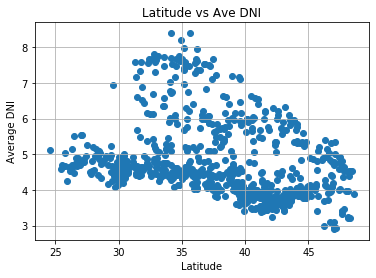

In [13]:
plt.scatter(combined_data["Lat"], combined_data["Ave DNI"])
plt.title('Latitude vs Ave DNI')
plt.xlabel('Latitude')
plt.ylabel('Average DNI')
plt.grid()
# plt.savefig('../output_data/Lat_vs_Ave_DNI.png')

## Latitude vs. Ave GHI Plot

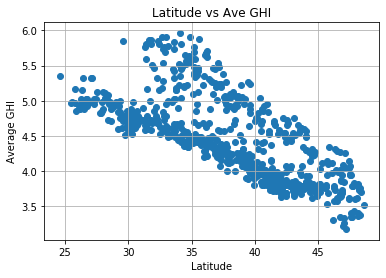

In [14]:
plt.scatter(combined_data["Lat"], combined_data["Ave GHI"])
plt.title('Latitude vs Ave GHI')
plt.xlabel('Latitude')
plt.ylabel('Average GHI')
plt.grid()

## Latitude vs. Ave Lat Tilt Plot

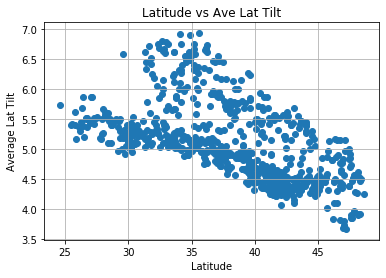

In [15]:
plt.scatter(combined_data["Lat"], combined_data["Ave Lat Tilt"])
plt.title('Latitude vs Ave Lat Tilt')
plt.xlabel('Latitude')
plt.ylabel('Average Lat Tilt')
plt.grid()

## Linear Regression

In [16]:
# # OPTIONAL: Create a function to create Linear Regression plots
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvalue=north['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=north[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Northern Latitudes vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()



In [17]:
# plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# south=weather_data.loc[(weather_data['Lat']<=0)]
# xvalue=south['Lat']

# #for loop here to change yvalue
# for each_variable in yvalues:
    
#     yvalue=south[each_variable]
#     (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
#     regress_values = xvalue * slope + intercept
#     line_eq = each_variable+"= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
#     plt.scatter(xvalue,yvalue)
#     plt.plot(xvalue,regress_values,"r-")
#     plt.annotate(line_eq,(xvalue.min(),yvalue.min()),fontsize=15,color="red")
#     plt.xlabel('Latitude')
#     plt.ylabel(each_variable)
#     plt.title(f'Southern Latitudea vs {each_variable}')
#     print(f" the rsquared value is {rvalue**2}")
#     plt.show()

In [18]:
# # Create Northern and Southern Hemisphere DataFrames
# north=weather_data.loc[(weather_data['Lat']>=0)]
# xvaluen=north['Lat']
# south=weather_data.loc[(weather_data['Lat']<0)]
# xvalues=south['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
# # plot_data=weather_data[['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']]
# # yvalues=['Max_Temp', 'Humidity', 'Cloudiness', 'Wind_Speed']
# # north=weather_data.loc[(weather_data['Lat']>=0)]
# # xvalue=north['Lat']

    
# yvalue=north['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Northern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Max_Temp.png')
# plt.show()

# print('For ever increase in Latitude towards the North Pole the Max Temp drop by a 1/4 of a degree')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
# yvalue=south['Max_Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Max Temp= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# plt.title(f'Southern Latitudes vs Max Temp')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Max_Temp.png')
# plt.show()

# print('As you move towards the equater the Max Temp increases by almost 1/2 a degree for each Latitude')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:
# yvalue=north['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Northern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:
# yvalue=south['Humidity']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Humidity= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),yvalue.min()),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Humidity')
# plt.title(f'Southern Latitudes vs Humidity')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Humidity.png')
# plt.show()

# print('Humidity and Latitude do not have a correlation')


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:
# yvalue=north['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Northern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Cloudiness.png')
# plt.show()

# print('There is a slight decress in Cloudiness as you move North')


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:
# yvalue=south['Cloudiness']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Cloudiness= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),12),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Cloudiness')
# plt.title(f'Southern Latitudes vs Cloudiness')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Cloudiness.png')
# plt.show()

# print('Slight incress in % Cloudiness as you move towards the equator')


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [25]:
# yvalue=north['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvaluen, yvalue)
# regress_values = xvaluen * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvaluen,yvalue)
# plt.plot(xvaluen,regress_values,"r-")
# plt.annotate(line_eq,(xvaluen.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Northern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Northern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [26]:
# yvalue=south['Wind_Speed']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalues, yvalue)
# regress_values = xvalues * slope + intercept
# line_eq = "Wind Speed= " + str(round(slope,2)) + "*Lat +" + str(round(intercept,2))
# plt.scatter(xvalues,yvalue)
# plt.plot(xvalues,regress_values,"r-")
# plt.annotate(line_eq,(xvalues.min(),10),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Wind Speed(MPH)')
# plt.title(f'Southern Latitudes vs Wind Speed(MPH)')
# print(f" the rsquared value is {rvalue**2}")
# plt.savefig('../output_data/Southern_Lat_vs_Wind_Speed.png')
# plt.show()

# print('There is very little correlation between Latitude and Wind Speed')
